模型评估

In [1]:
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import process_time
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 


# Importing the Keras libraries and packages
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, accuracy_score

import itertools
import tensorflow as tf
from keras import optimizers
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau   

#Créer la couche entrée totalement connecté avec la couche dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, AveragePooling1D,BatchNormalization,SpatialDropout1D
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

Input the dataset 

In [2]:
data_path = "../Dataset/binary/dataset_binary.csv"  # the original dataset
dataset = pd.read_csv(data_path)  # read the raw dataset into data-frame

df_raw = dataset.copy()

Random shuffle dataset

Split training set and testing 

In [3]:
# shuffle the df order
sklearn.utils.shuffle(df_raw)

# split feature, target arrays 
X, y = df_raw.iloc[:, :-2], df_raw.iloc[:, -1]

# split dataset: training set-80% testing set-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
def training_model(classifier, X_train, X_test, y_train, y_test):
    """
    Building ML models and predict the results
    Args:
        X_train (_dataframe_): training dataset - input features
        X_test (_dataframe_): testing dateset - input feature
        y_train (_series_): training dataset - output label
        y_test (_series_): testing dateset - output label

    Returns:
        model: machine learning model
        y_pred: the result predicted by the model
    """
    # training model
    model_history = classifier.fit(X_train, y_train)
    # predict test dataset
    y_pred = classifier.predict(X_test)
    
    print(f"Training Score: {classifier.score(X_train, y_train)}") 
    print(f"Test Score: {classifier.score(X_test, y_test)}")
    
    return model_history, y_pred

In [7]:
def DT_model(X_train, X_test, y_train, y_test):
    """
    1 - Building a Decision Tree classifier
    """
    # building the DT model
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 2022)
    # training a decision tree model
    DT_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return DT_model, y_pred


def RF_model(X_train, X_test, y_train, y_test):
    """
    2 - Building a Random Forests classifier
    """
    # build the RF model
    classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 2022)
    # training a random forest model
    RF_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return RF_model, y_pred


def LGR_model(X_train, X_test, y_train, y_test):
    """
    3 - Building a Logistic Regression classifier
    """
    classifier = LogisticRegression(solver='saga', C=1.0, random_state = 2022, max_iter = 8000)
    LGR_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return LGR_model, y_pred


def KNN_model(X_train, X_test, y_train, y_test):
    """
    4 - Building a K-neighbors classifier classifier
    """
    # build the KNN model
    classifier = KNeighborsClassifier()
    # training a random forest model
    KNN_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return KNN_model, y_pred


def SVM_model(X_train, X_test, y_train, y_test):
    """
    5 - Building a RBF Support Vector Machine classifier
    """
    # build the SVM model
    classifier = SVC(kernel = 'linear', gamma='scale', random_state =2022)
    # training a support vector machine model
    SVM_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return SVM_model, y_pred


def NB_model(X_train, X_test, y_train, y_test):
    """
    6 - Building a Naive Bayes classifier
    """
    # build the NB model - Without parameters
    classifier = GaussianNB()
    # training a support vector machine model
    NB_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return NB_model, y_pred


def GB_model(X_train, X_test, y_train, y_test):
    """
    7 - Building a Gradient Boosting classifier
    """
    # build the NB model - Without parameters
    classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features='sqrt', subsample=0.8, random_state=10)
    # training a support vector machine model
    GB_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return GB_model, y_pred


def MLP_model(X_train, X_test, y_train, y_test):
    """
    8 - Building a multilayer perceptron classifier
    """
    # build the MLP model
    classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 100), activation='relu', solver='sgd', random_state=2022, max_iter=4000)
    # training a support vector machine model
    MLP_model, y_pred = training_model(classifier, X_train, X_test, y_train, y_test)
    return MLP_model, y_pred

Model Evaluation

In [5]:
def plot_acc_loss(model_history):
    acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    epochs = range(len(acc))
    
    # plot training accuracy
    plt.plot(epochs, acc, 'r', label='train_acc')
    plt.plot(epochs, val_acc, 'b', label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend()
    plt.figure()
    
    # plot training loss
    plt.plot(epochs, loss, 'r', label='training_loss')
    plt.plot(epochs, val_loss, 'b', label='Validation_loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss') 
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    print(np.max(model_history.history['accuracy']))
    print(np.max(model_history.history['val_accuracy']))


def plot_confusion_matrix(y_test, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    cm = confusion_matrix(y_test, y_pred)  # calculate confusion matrix
    # print(cm)
    
    # plot the heat map for confusion matrix 
    plt.figure()
    plt.figure(figsize=(12, 12))  #s set plot size
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return cm
    

def models_evaluate(model, input_test, output_test):
    # using test dataset in trained model
    y_pred = np.around(model.predict(input_test))
    print('-----------------------------------------------------------------------------------------------------')
    acc_score = accuracy_score(output_test, y_pred)
    print('Testing accuracy: {:1.5f}' .format(acc_score))
    print('-----------------------------------------------------------------------------------------------------')
    print(classification_report(output_test, y_pred, digits=5))
    print('-----------------------------------------------------------------------------------------------------')
    
    # plot the confusion matrix
    CM = plot_confusion_matrix(output_test, y_pred, classes=list(range(2)), title='"Malicious or normal" confusion matrix')
    
    # calculate assessment benchmark indicators
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    # TP, FP, TN, FN = perf_measure(y_pred, output_test.tolist())
    fp_rate = FP / (TN + FP)  # false positive rate
    tn_rate = TN / (TN + FP)  # true negative rate
    auc = roc_auc_score(y_true = y_pred, y_score = output_test.tolist())  # area under the curve
    # accuracy = (TP + TN) / (TP + FP + TN + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    # print the above benchmark indicators
    print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
    print('-----------------------------------------------------------------------------------------------------')
    print('Precision: {:1.5f}' .format(precision))
    print('-----------------------------------------------------------------------------------------------------')
    print('Recall: {:1.5f}' .format(recall))
    print('-----------------------------------------------------------------------------------------------------')
    print('False Positive Rate: {:1.5f}' .format(fp_rate), '\nTrue Negative Rate {:1.5f}' .format(tn_rate))
    print('-----------------------------------------------------------------------------------------------------')
    
    # plot receiver operating characteristic curve (ROC)
    print('-----------------------------------------------------------------------------------------------------')
    print('AUC: {:1.5f}' .format(auc))
    fpr, tpr, _ = roc_curve(output_test.tolist(), y_pred)  # 计算真正率和假正率

    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % auc)  # 假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Decision Tree

Training Score: 0.9999938059624838
Test Score: 0.9980901727516172
-----------------------------------------------------------------------------------------------------
Testing accuracy: 0.99809
-----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0    0.99812   0.99806   0.99809    242449
           1    0.99806   0.99812   0.99809    241888

    accuracy                        0.99809    484337
   macro avg    0.99809   0.99809   0.99809    484337
weighted avg    0.99809   0.99809   0.99809    484337

-----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

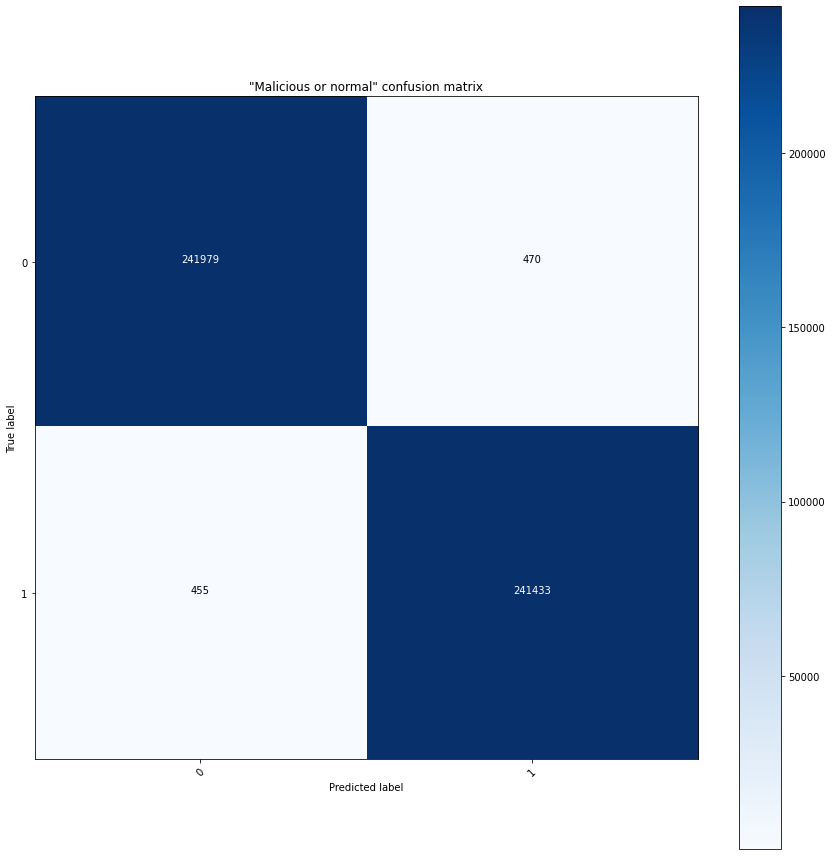

TP: 241433 FP: 470 TN: 241979 FN: 455
-----------------------------------------------------------------------------------------------------
Precision: 0.99806
-----------------------------------------------------------------------------------------------------
Recall: 0.99812
-----------------------------------------------------------------------------------------------------
False Positive Rate: 0.00194 
True Negative Rate 0.99806
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
AUC: 0.99809


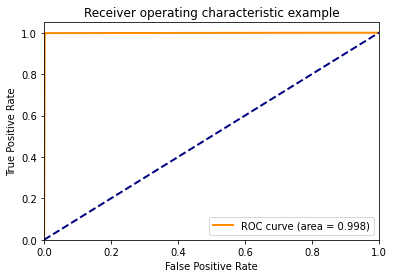

In [8]:
# train random forests model
dt_model, y_pred_dt = DT_model(X_train, X_test, y_train, y_test)
# evaluate model
models_evaluate(dt_model, X_test, y_test)

Random Forests

In [ ]:
# train random forests model
rf_model, y_pred_rf = RF_model(X_train, X_test, y_train, y_test)

# evaluate model
models_evaluate(rf_model, X_test, y_test)

Logistic Regression

In [ ]:
# train logistics regression model
lgr_model, y_pred_lgr = LGR_model(X_train, X_test, y_train, y_test)
# evaluate logistics regression  model
models_evaluate(lgr_model, X_test, y_test)

k-Nearest Neighbor - KNN

In [ ]:
# train knn model
knn_model, y_pred_KNN = KNN_model(X_train, X_test, y_train, y_test)
# evaluate knn model
models_evaluate(knn_model, X_test, y_test)

Support Vector Machine

In [ ]:
# train svm model
svm_model, y_pred_svm = SVM_model(X_train, X_test, y_train, y_test)
# evaluate svm model
models_evaluate(svm_model, X_test, y_test)

Naive Bayes

In [ ]:
# train svm model
nb_model, y_pred_nb = NB_model(X_train, X_test, y_train, y_test)
# evaluate svm model
models_evaluate(nb_model, X_test, y_test)

Gradient Boosting - GB

In [ ]:
# train svm model
gb_model, y_pred_gb = GB_model(X_train, X_test, y_train, y_test)
# evaluate svm model
models_evaluate(gb_model, X_test, y_test) 

Multilayer Perceptron - MLP

In [ ]:
# train mlp model
mlp_model, y_pred_mlp= MLP_model(X_train, X_test, y_train, y_test)
# evaluate mlp model
models_evaluate(mlp_model, X_test, y_test)

Standardization

In [ ]:
SCALE_IN = StandardScaler()
SCALE_IN.fit(X_train)
X_train = SCALE_IN.transform(X_train)
X_test = SCALE_IN.transform(X_test)

ANN Model

In [ ]:
input_dimension = 150
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=input_dimension,kernel_initializer='RandomNormal',activation='relu'))      
ann_model.add(tf.keras.layers.Dense(units=128,kernel_initializer='RandomNormal',activation='relu')) 
ann_model.add(tf.keras.layers.Dense(units=256,kernel_initializer='RandomNormal',activation='relu'))                     
ann_model.add(tf.keras.layers.Dense(units=520,kernel_initializer='RandomNormal',activation='relu')) 
ann_model.add(tf.keras.layers.Dense(units=1024,kernel_initializer='RandomNormal',activation='relu'))                     
ann_model.add(tf.keras.layers.Dense(units=10,kernel_initializer='RandomNormal',activation='relu'))

ann_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                   
ann_model.compile(tf.keras.optimizers.Adam(lr=0.001, decay=0.0001), loss = 'binary_crossentropy', metrics =['accuracy'])

In [ ]:
t1_start = process_time() 
ann_history = ann_model.fit(X_train, y_train, batch_size=256, epochs = 15, validation_data=(X_test, y_test), shuffle=True)
t1_stop = process_time()
print("time:", t1_stop-t1_start)

In [ ]:
plot_acc_loss(ann_history)  # plot training accuracy and loss
y_pred_ann = models_evaluate(ann_model, X_test, y_test)  # evaluate ann model

Long Short-Term Memory - LSTM

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Initialising the RNN
LSTM_model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
LSTM_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
LSTM_model.add(LSTM(units = 50, return_sequences = True))
LSTM_model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
LSTM_model.add(LSTM(units = 25, return_sequences = True))
LSTM_model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
LSTM_model.add(LSTM(units = 25))
LSTM_model.add(Dropout(0.2))

# Adding the output layer
LSTM_model.add(Dense(units = 1,activation='sigmoid'))

adam = optimizers.Adam(lr=5e-7, beta_1=0.9, beta_2=0.999)

# Compiling the RNN
LSTM_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# LSTM_model.load_weights('output.hdf5')

# # Fitting the RNN to the Training set
checkpoint = ModelCheckpoint('output.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode = 'max')
reducelr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose = 1, mode = 'auto')

LSTM_history = LSTM_model.fit(x=X_train, y=y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10, callbacks = [reducelr, checkpoint])

In [ ]:
plot_acc_loss(LSTM_history)  # plot training accuracy and loss
y_pred_lstm = models_evaluate(LSTM_model, X_test, y_test)  # evaluate LSTM model